In [1]:
# Install libraries
%pip install -U pysr


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: /home/richard/Documents/p311a/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Call Libraries
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from google.colab import drive
from pysr import PySRRegressor
import time
#import math
import sympy as sym

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [3]:
#drive.mount('/content/drive')
df=pd.read_csv('./goossens_raw.csv')
#df=pd.read_csv('./c694/goossens_raw.csv')
#df=pd.read_csv('/content/drive/MyDrive/goossens_raw.csv')
#df
y=df['MW']
#print(y)
x=df[['SG','TBP']]

In [4]:
t0 = time.time()
# Add Log and Exp Functions
myMod=PySRRegressor(
    random_state=7,
    deterministic=True,
    parallelism='serial',
    binary_operators=["+","-","*","/"],
    unary_operators=["exp","log"])
myMod.fit(x,y)
y_pred=myMod.predict(x)
print("time to fit: ",time.time() - t0, 'seconds')

/home/richard/Documents/p311a/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
Compiling Julia backend...
[ Info: Started!



Expressions evaluated per second: 6.600e+04
Progress: 337 / 3100 total iterations (10.871%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           9.627e+04  0.000e+00  y = 304.54
3           2.941e+04  5.897e-01  y = TBP + -270.61
5           2.347e+04  1.116e-01  y = (TBP * 1.3999) - 500.63
7           1.873e+04  1.117e-01  y = (TBP / (1166.2 / TBP)) / SG
8           1.777e+04  5.022e-02  y = (TBP / 0.57038) - exp(SG + 5.6783)
9           1.146e+04  4.377e-01  y = (TBP + -433.69) * (3.3134 - (1251.4 / TBP))
10          1.062e+04  7.443e-02  y = (TBP + -388.72) / (exp(439.7 / TBP) + -1.0799)
11          7.949e+03  2.893e-01  y = (TBP + -410.44) * ((3.1277 - (1289.8 / TBP)) / SG)
13          7.270e+03  4.434e-02  y = ((2.9572 - (1244.9 / TBP)) * ((TBP + -402.35) / SG)) -...
             

[ Info: Final population:
[ Info: Results saved to:


time to fit:  60.50427174568176 seconds
  - outputs/20250721_110158_78g7li/hall_of_fame.csv


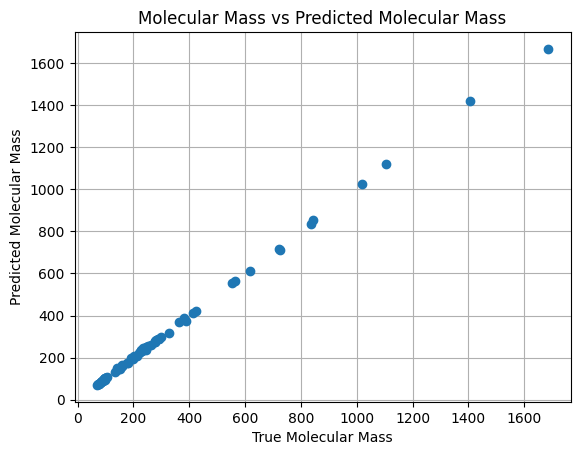

In [5]:
plt.plot(y,y_pred,marker="o",linestyle="None")
plt.xlabel('True Molecular Mass')
plt.ylabel('Predicted Molecular Mass')
plt.title('Molecular Mass vs Predicted Molecular Mass')
plt.grid()
plt.show()

In [6]:
# Pull Out Equation
myEq=myMod.sympy()
# Clean-Up Equation
sym.simplify(myEq)

(SG*(21.313414 - exp(exp(SG)))*(3.7427928*TBP - 4415.0024) - 1072.52229930056*TBP + 207021.815732279)/(SG*(3.7427928*TBP - 4415.0024))

In [7]:
# Add Prediction to Dataframe
df['Fit_Mw']=y_pred
# Calculate Correlation Coefficient between columns
df.corr()

,SG,TBP,MW,Fit_Mw
SG,1.000000,0.625218,0.334852,0.332146
TBP,0.625218,1.000000,0.869591,0.868923
MW,0.334852,0.869591,1.000000,0.999832
Fit_Mw,0.332146,0.868923,0.999832,1.000000


In [8]:
print(myMod)

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          304.54074   
	1         0.592876                                   TBP + -270.62198   
	2         0.229607                        (TBP * TBP) * 0.00093600777   
	3         0.113724                      TBP * (log(TBP) + -5.8921685)   
	4         1.850316       830.30756 / ((4407.6484 / TBP) + -3.8213634)   
	5         0.857595  748.5048 / (((4430.1235 / TBP) + -3.8578951) *...   
	6         1.091857  ((886.26276 / ((4395.7026 / TBP) + -3.7308798)...   
	7         0.037275  (((897.23016 / ((4390.7905 / TBP) + -3.7193837...   
	8         0.042738  (((898.1733 / ((4393.312 / TBP) + -3.7212038))...   
	9         0.047870  (((896.2533 / ((4391.2754 / TBP) + -3.720391))...   
	10  >>>>  0.281113  (((897.02075 / ((4415.0024 / TBP) + -3.7427928...   
	11        0.084331  ((SG + ((-1.2548198 / SG) + -1.8260431)) * (-4...   
	12      